In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('time_messagees.txt', header = None, names =['time', 'num_of_messeges'])
df

,time,num_of_messeges
0,00:00:00,0.0
1,00:00:01,1.0
2,00:00:02,0.0
3,00:00:03,6.0
4,00:00:04,7.0
...,...,...
86391,23:59:51,0.0
86392,23:59:52,0.0
86393,23:59:53,3.0
86394,23:59:54,1.0


Не нашел решения как в sklearn работать с временными рядами привел столбец времени к секундам от начала дня 

In [3]:
sec = df['time'].map(lambda x: x.split(':'))
df.insert(loc= 1 , column='time_in_sec', value=sec.map(lambda x: (int(x[0])*3600)+ (int(x[1])*60) + int(x[2])))
df['num_of_messeges'] = df['num_of_messeges'].astype(int)
df

,time,time_in_sec,num_of_messeges
0,00:00:00,0,0
1,00:00:01,1,1
2,00:00:02,2,0
3,00:00:03,3,6
4,00:00:04,4,7
...,...,...,...
86391,23:59:51,86391,0
86392,23:59:52,86392,0
86393,23:59:53,86393,3
86394,23:59:54,86394,1


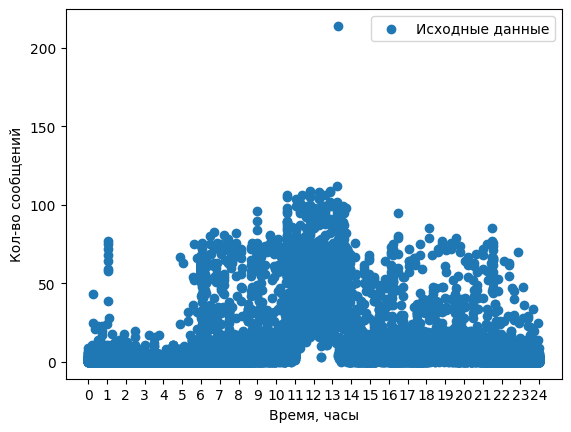

In [6]:
plt.scatter( df['time_in_sec'],df['num_of_messeges'], label="Исходные данные")
plt.xlabel('Время, часы')
plt.ylabel('Кол-во сообщений')
plt.xticks(np.arange(0,25)*3600, np.arange(0,25))
plt.legend()

In [7]:
X = df['time_in_sec'].to_numpy().reshape(-1, 1)
y = df['num_of_messeges'].to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# The mean squared error
print("mean squared error = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score = %.2f" % r2_score(y_test, y_pred))

mean squared error = 362.88
r2_score = 0.00


Исходя из метрик можно сделать вывод, что модель довольно плохо описывает данные, смею предположить, что такие данные будет лучше описывать посредством нелинейной регрессии

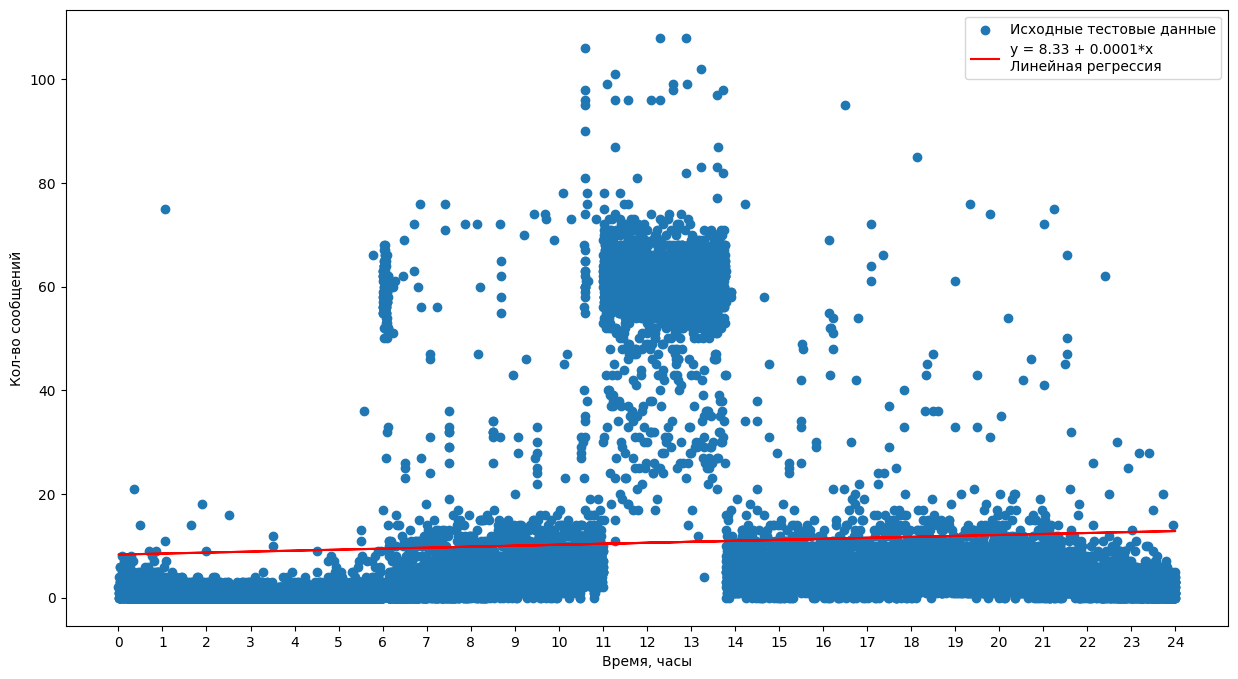

In [11]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test, y_test, label="Исходные тестовые данные")
plt.plot(X_test, y_pred,'r-', label=f"y = {round(model.intercept_[0],2)} + {round(model.coef_[0][0],4)}*x \nЛинейная регрессия")
plt.xlabel('Время, часы')
plt.ylabel('Кол-во сообщений')
plt.xticks(np.arange(0,25)*3600, np.arange(0,25))
plt.legend()